In [212]:
import numpy as np
from sympy import *
from sympy.physics.quantum import TensorProduct
init_printing(use_unicode = True)

In [40]:
x = symbols('x')
y = symbols('y')

In [101]:
def partial_trace(M, n):
    D = len(M.row(0)) # get the dimension of matrix M
    d = int(D / n) # calculate the dimension of partial-traced matrix
    M_ptr = zeros(d) # create a blank partial trace matrix
    for i in range(d):
        for j in range(d):
            for k in range(n):
                M_ptr[i, j] += M[n*i + k, n*j + k]
    return M_ptr

In [ ]:
'''
index = 0 -> block.dimension = D / n**1
index = 1 -> block.dimension = D / n**2
index = 2 -> block.dimension = D / n**3
...
index = int(np.log(D) / np.log(n)) - 1 -> block.dimension = 1

'''

In [325]:
def partial_transpose(M, n, index):
    '''
        M: matrix
        n: dimension of single particle state
        index: indicates which particle is transposed. Range: [0, log(D)/log(n) - 1]
    '''
    D = len(M.row(0)) # get the dimension of matrix M 16
    Db = int(D / n**(index + 1)) # get the dimension of to-be-transposed little block 8
    DB = int(n * Db) # get the dimension of big block 16
    N = int(D / DB) # get the big block number in a row 1

    M_pt = zeros(D)
    
    for i in range(N): # i & j are indices for big block position
        for j in range(N):
            for p in range(n): # p & q are indices for little blocks in one big block (to be exchanged)
                for q in range(n): 
                    for r in range(Db): # r & s are indices for elements in one little block
                        for s in range(Db):
                            M_pt[DB*i + Db*p + r, DB*j + Db*q + s] = M[DB*i + Db*q + r, DB*j + Db*p + s]
    return M_pt

In [153]:
def block_diagonalize(M, sequence):
    A = M.copy()
    B = M.copy()
    n = 0
    for i in sequence:
        A[n, :] = M.row(i)
        n = n + 1
    n = 0
    for j in sequence:
        B[:, n] = A.col(j)
        n = n + 1
    return B

# Problem 1

In [116]:
M = eye(27)
for i in range(27):
    M[i, i] = 1 - x
    
M[0, 0] = M[0, 0] + 9*x
M[13, 13] = M[13, 13] + 9*x
M[26, 26] = M[26, 26] + 9*x

M[1, 12] = M[1, 12] + 9*x
M[12, 1] = M[12, 1] + 9*x

M[2, 24] = M[2, 24] + 9*x
M[24, 2] = M[24, 2] + 9*x

M[14, 25] = M[14, 25] + 9*x
M[25, 14] = M[25, 14] + 9*x

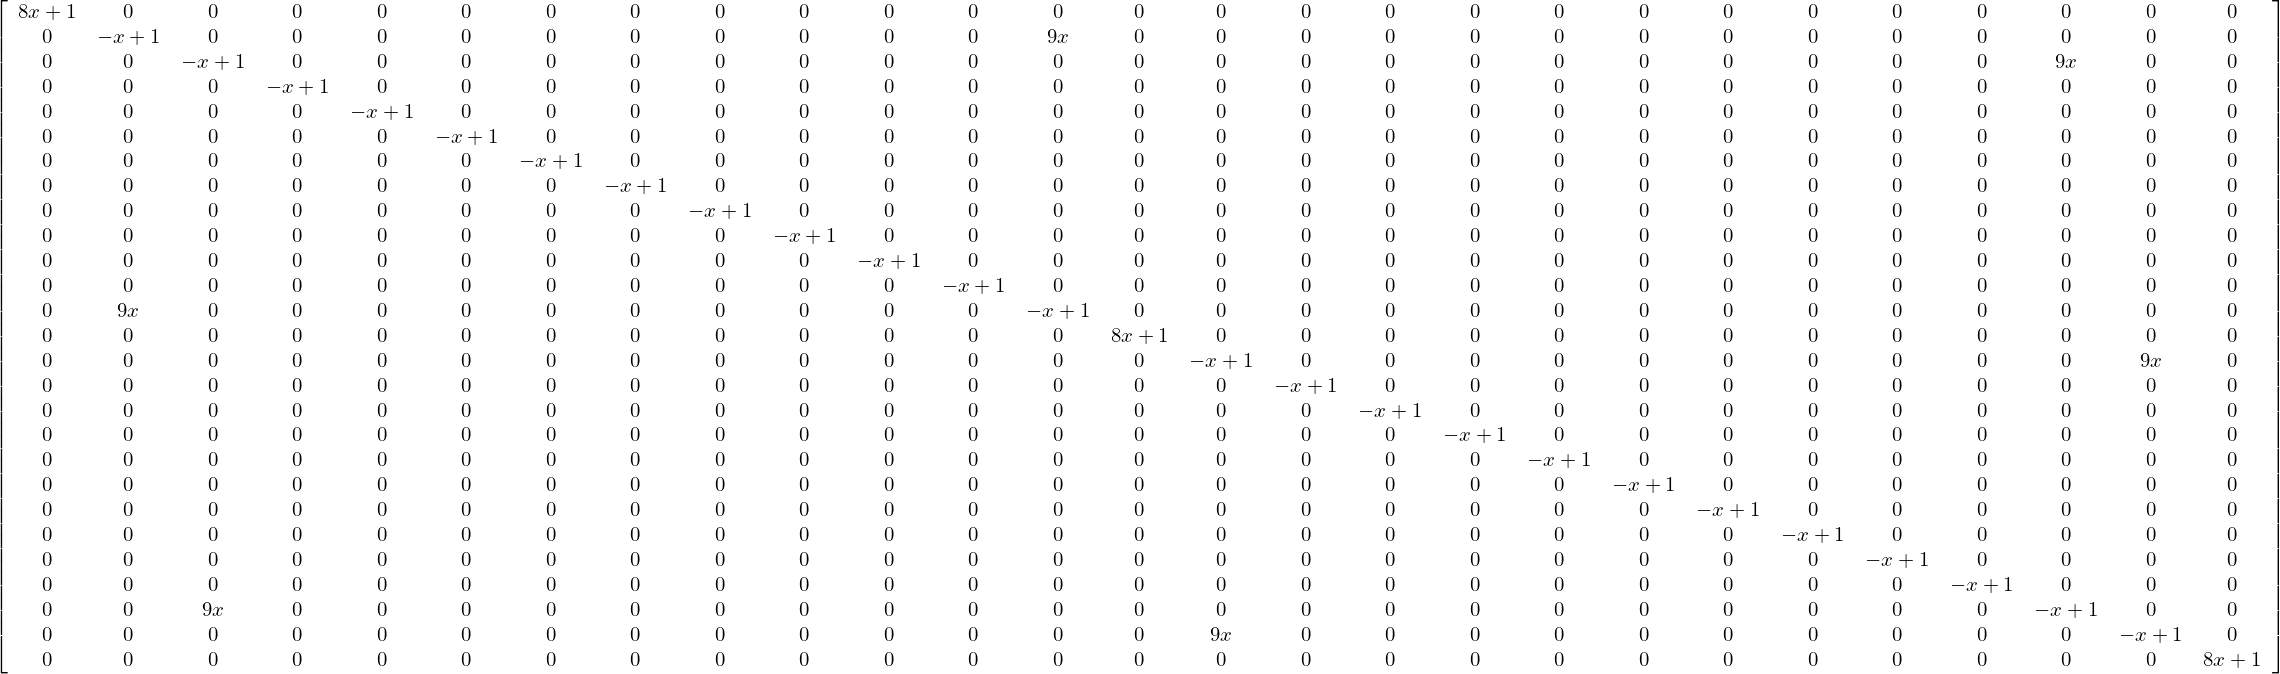

In [117]:
M

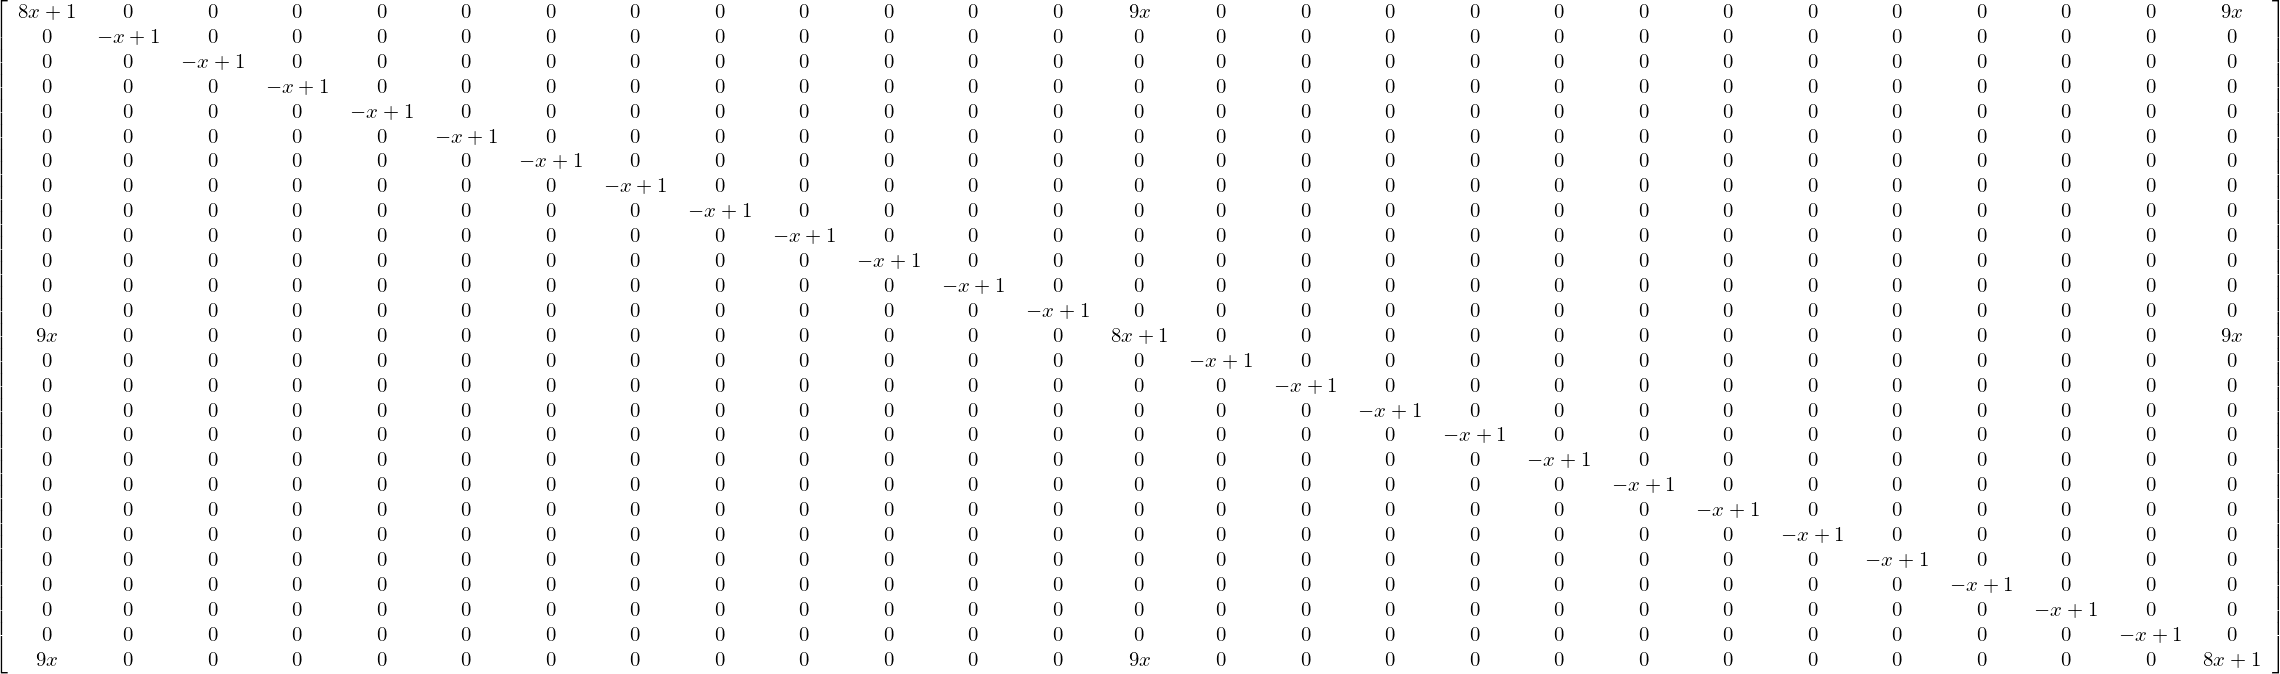

In [119]:
partial_transpose(M, 3)

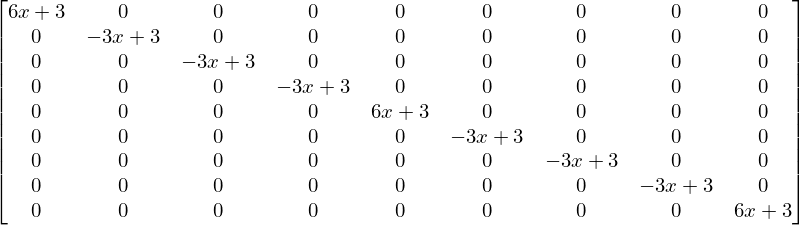

In [118]:
partial_trace(M, 3)

In [37]:
M = Matrix([
    [1 - x, 9*x],
    [9*x, 1 - x]
])

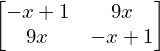

In [38]:
M

In [39]:
M.eigenvals()

In [41]:
M = Matrix([
    [1 + 3*x - y, 3*x],
    [3*x, 1 + 3*x - y]
])

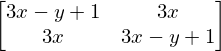

In [42]:
M

In [43]:
M.eigenvals()

# Problem 2

In [286]:
rho = eye(8)
for i in range(8):
    rho[i, i] = (1 - x - y) / 8
    
no_1 = [0, 7]
for i in no_1:
    for j in no_1:
        rho[i, j] += x / 2
        
no_2 = [1, 2, 4]
for i in no_2:
    for j in no_2:
        rho[i, j] += y / 3

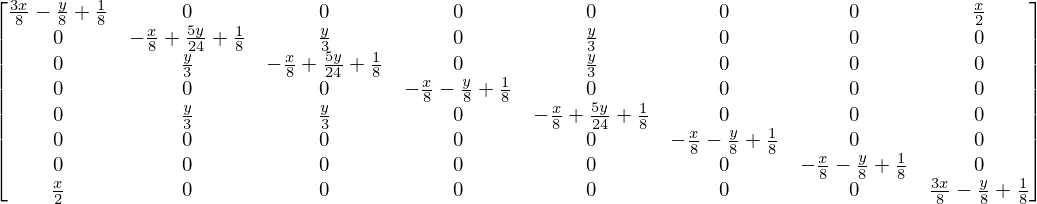

In [289]:
rho

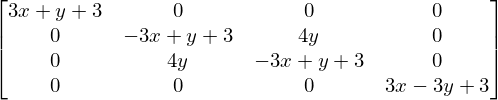

In [291]:
partial_trace(rho, 2) * 12

In [292]:
rho_ptr = partial_trace(rho, 2)

In [297]:
XXX = partial_transpose(rho_ptr, 2) * 12

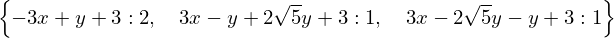

In [298]:
XXX.eigenvals()

In [64]:
M = Matrix([
    [3 + 9*x - 3*y, 8*y, 8*y],
    [8*y, 3 - 3*x - 3*y, 0],
    [8*y, 0, 3 - 3*x - 3*y]
])

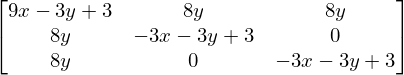

In [65]:
M

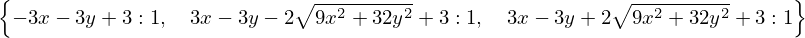

In [66]:
M.eigenvals()

In [ ]:
(1 - y) + 3 * np.sqrt(4 / 9 *(1 - y)**2 - + 128 / 27 *y**2) = x

In [ ]:
1 / 3 *(1 - y)**2 - 128 / 27 *y**2 = x**2

In [55]:
M = Matrix([
    [3 - 3*x + 5*y, 8*y],
    [8*y, 3 - 3*x + 5*y]
])

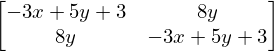

In [56]:
M

In [57]:
M.eigenvals()

In [280]:
M = Matrix([
    [3 - 3*x + 5*y, 12*x],
    [12*x, 3 - 3*x - 3*y]
])

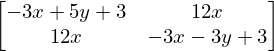

In [281]:
M

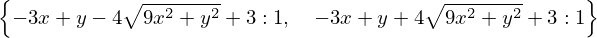

In [282]:
M.eigenvals()

In [ ]:
3 - 3*x + y

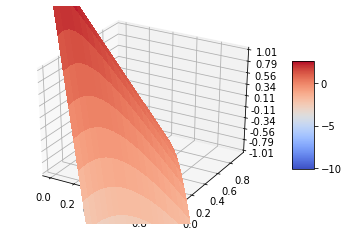

In [285]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(0, 1, 0.05)
Y = np.arange(0, 1, 0.05)
X, Y = np.meshgrid(X, Y)
Z = 3 + 3 * X - 3 * Y - 2 * np.sqrt(9 * X**2 + 32 * Y**2)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# Problem 3

In [304]:
p = symbols('p')

In [305]:
M = eye(16)
for i in range(16):
    M[i, i] = p
    
no = [3, 5, 6, 9]
for i in no:
    for j in no:
        M[i, j] += 4 * (1 - p)

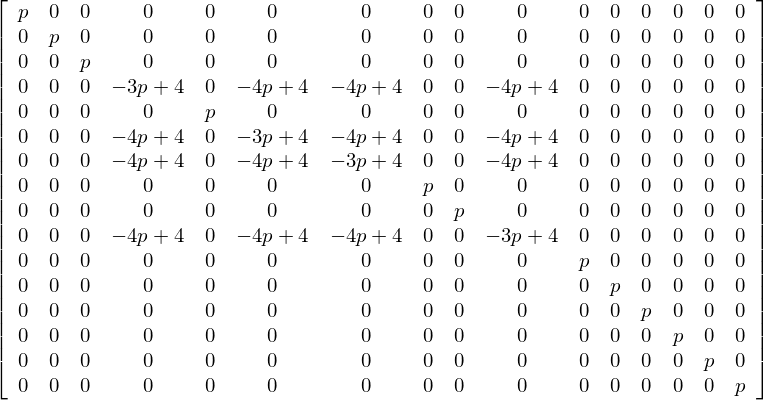

In [306]:
M

## A-BCD

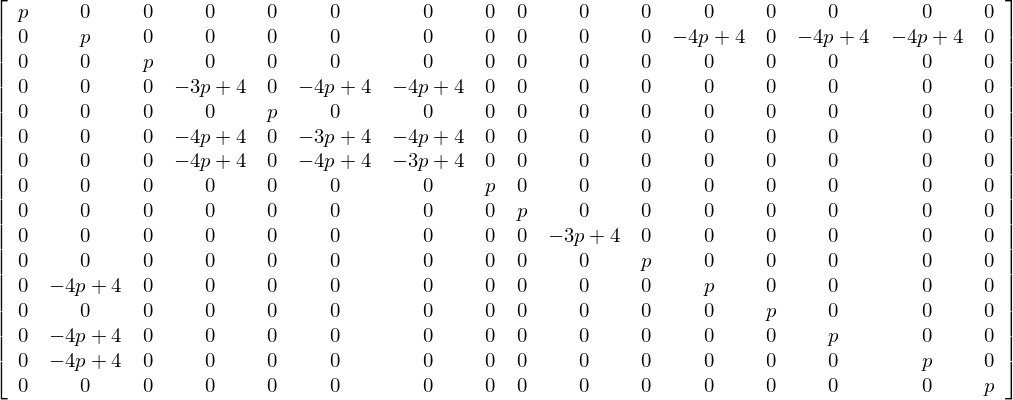

In [338]:
M_pt = partial_transpose(M, 2, 0)
M_pt

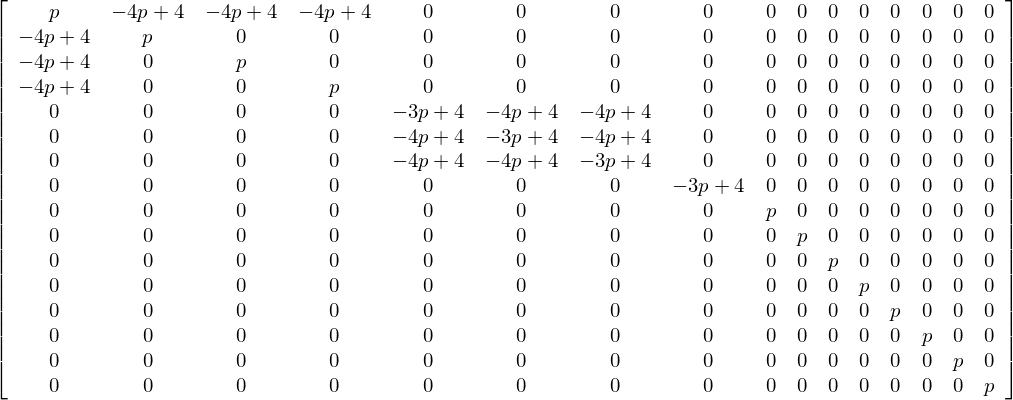

In [339]:
s = [1, 11, 13, 14, 3, 5, 6, 9, 0, 2, 7, 8, 10, 12, 15, 4]
M_pt_bd = block_diagonalize(M_pt, s)
M_pt_bd

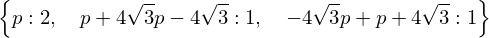

In [340]:
M_pt_bd[0:4, 0:4].eigenvals()

In [341]:
M_pt_bd[4:7, 4:7].eigenvals()

## B-ACD

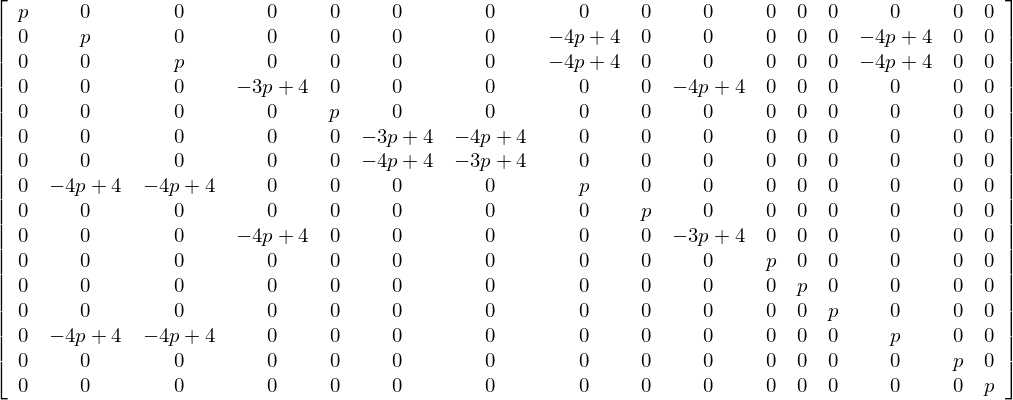

In [342]:
M_pt = partial_transpose(M, 2, 1)
M_pt

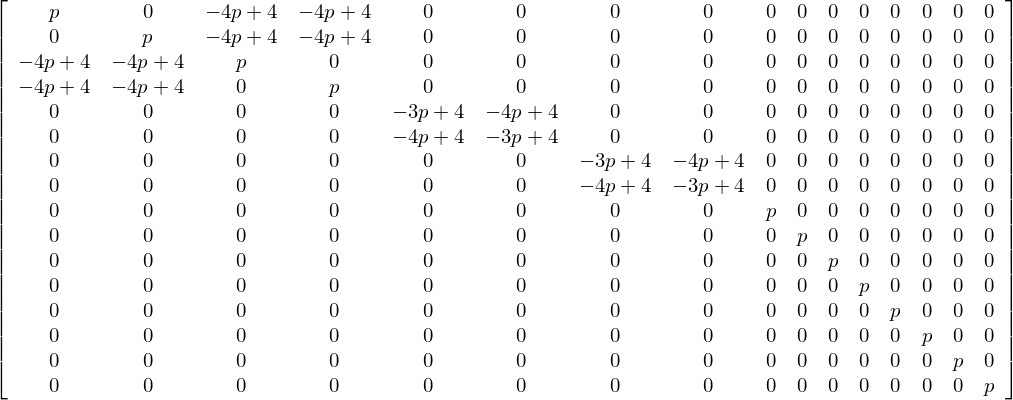

In [343]:
s = [1, 2, 7, 13, 3, 9, 5, 6, 0, 4, 8, 10, 11, 12, 14, 15]
M_pt_bd = block_diagonalize(M_pt, s)
M_pt_bd

In [344]:
M_pt_bd[0:4, 0:4].eigenvals()

In [345]:
M_pt_bd[4:6, 4:6].eigenvals()

In [346]:
8/9

In [261]:
# AB-CD type
W = zeros(16)

for i in range(4): # i & j are indices for block position
    for j in range(4):
        for p in range(2): # p & q are indices for elements in one block
            for q in range(2): 
                for m in range(2):
                    for n in range(2):
                        W[4*i + 2*p + m, 4*j + 2*q + n] = M[4*i + 2*q + m, 4*j + 2*p + n]

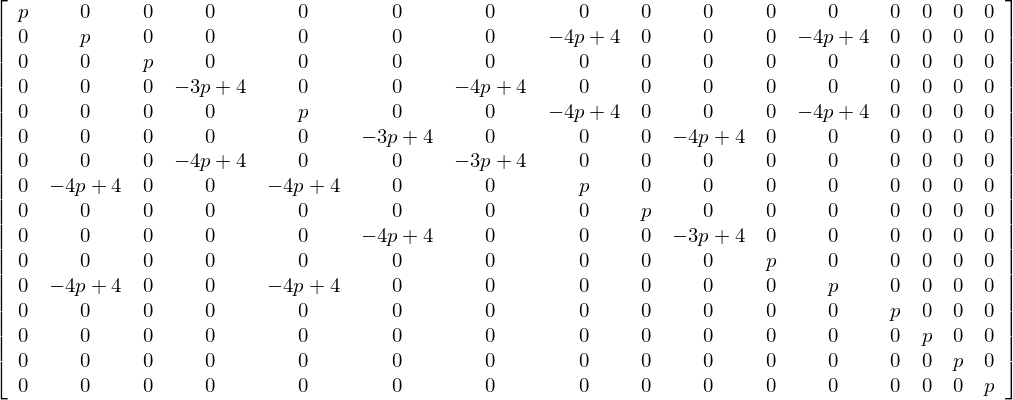

In [262]:
W

In [266]:
K = W[1:12, 1:12].copy()

In [277]:
K.row_del(7)

In [279]:
K.eigenvals()

In [124]:
M_pt = partial_transpose(M, 2)

In [154]:
M_ptr = partial_trace(M, 2)

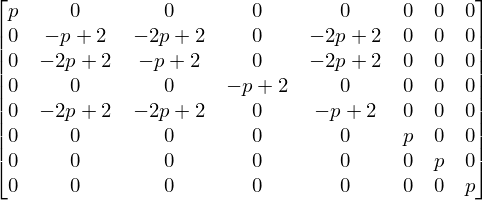

In [207]:
M_ptr / 2

In [149]:
sequence = [3, 5, 9, 2, 4, 7, 8, 6, 0, 1, 10, 11, 12, 13, 14, 15]

In [156]:
M_pt_bd = block_diagonalize(M_pt, sequence)

In [164]:
M_pt_bd[0:3, 0:3].eigenvals()

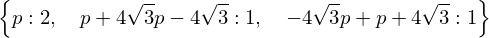

In [163]:
M_pt_bd[3:7, 3:7].eigenvals()

In [167]:
t = 4*np.sqrt(3)

In [169]:
t / (1 + t)

In [170]:
t / (t - 1)

In [173]:
A = partial_transpose(M_ptr, 2)

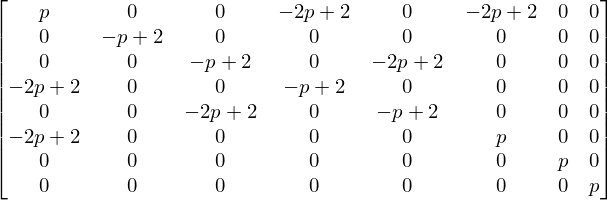

In [208]:
A / 2

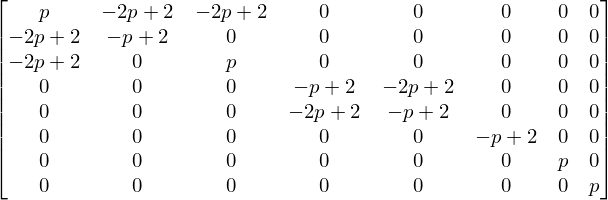

In [209]:
s = [0, 3, 5, 2, 4, 1, 6, 7]
B = block_diagonalize(A, s)
B / 2

In [199]:
B[3:5, 3:5].eigenvals()

In [188]:
C = B[0:3, 0:3]

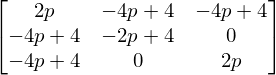

In [189]:
C

In [197]:
D = Matrix([
    [1.8, 0.4, 0.4],
    [0.4, 2.2, 0],
    [0.4, 0, 1.8]
])

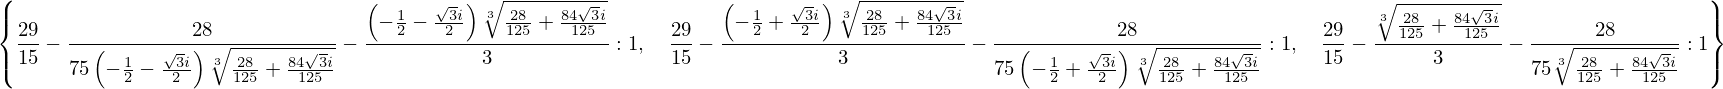

In [198]:
D.eigenvals()

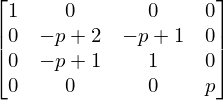

In [205]:
partial_trace(M_ptr,2) / 4

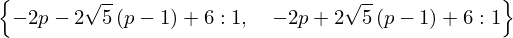

In [202]:
partial_trace(M_ptr,2)[1:3, 1:3].eigenvals()

In [214]:
A = Matrix([
    [1, 0, 0, 1],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [1, 0, 0, 1]
])

B = Matrix([
    [1, 0],
    [0, 0]
])

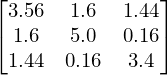

In [211]:
D * D

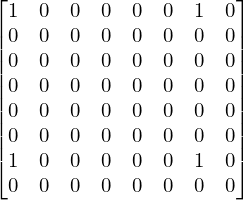

In [215]:
TensorProduct(A, B)

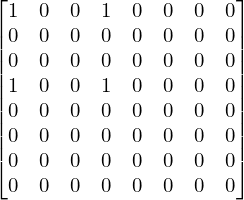

In [216]:
TensorProduct(B, A)

In [220]:
C = TensorProduct(A, B) + TensorProduct(B, A)

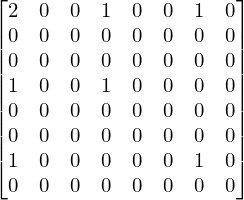

In [221]:
C

In [222]:
C[0, 0] = 3
C[0, 5] = 1
C[5, 0] = 1
C[5, 5] = 1

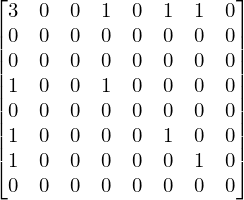

In [223]:
C

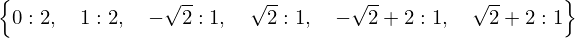

In [225]:
partial_transpose(C, 2).eigenvals()

In [227]:
D = partial_trace(C, 2)

In [229]:
partial_transpose(D, 2).eigenvals()

# Problem 5

In [232]:
p = symbols('p')

In [239]:
P_3 = zeros(9)
    
no = [0, 4, 8]
for i in no:
    for j in no:
        P_3[i, j] += 1

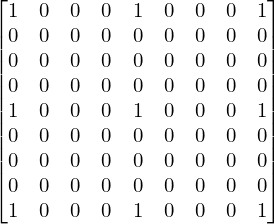

In [240]:
P_3

In [236]:
P_1 = zeros(3)
P_1[0, 0] = 1
P_2 = zeros(3)
P_2[1, 1] = 1

In [237]:
P_12 = TensorProduct(P_1, P_2)

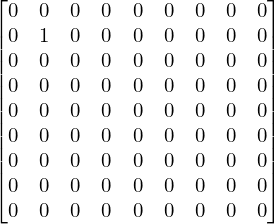

In [238]:
P_12

In [246]:
rho = P_3 * p + P_12 * (1 - p) * 3

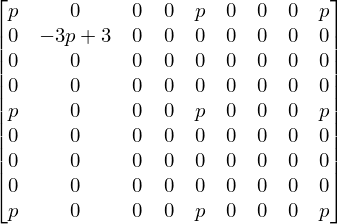

In [247]:
rho

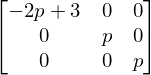

In [252]:
rho_A = partial_trace(rho, 3)
rho_A

In [254]:
X = TensorProduct(rho_A, eye(3)) - rho

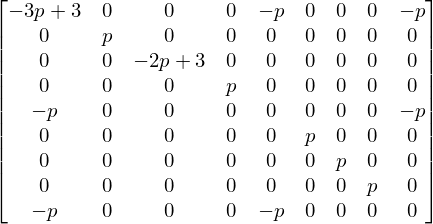

In [256]:
X

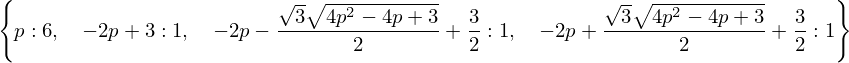

In [255]:
X.eigenvals()